<a href="https://colab.research.google.com/github/Godwin-88/Machine-Learning-in-Finance/blob/main/Data_Science_and_Machine_Learning_in_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS


In [ ]:
# Load the final dataset
df = pd.read_excel('/content/Final_Dataset.xlsx')

In [ ]:
df.head()

,Date,C,GS,VIXCLS,WY,XOM,Amazon,SnP,TB,INDPRO,TCU,UNRATE,EMVELECTGOVRN,RECPROUSM156N,TENEXPCHAREARISPRE,EPUFINREG,WPU1174,BUSLOANS
0,2000-01-04,-0.043485,-0.026379,0.109441,-0.105097,-0.017742,-0.086884,-0.039909,6.00,91.6261,82.0528,4.0,0.40981,0.0,1.341239,16.605135,134.7,1003.637
1,2000-01-05,0.003697,0.003140,-0.022464,-0.043688,0.053082,-0.161039,0.001787,6.05,91.6261,82.0528,4.0,0.40981,0.0,1.341239,16.605135,134.7,1003.637
2,2000-01-06,0.063154,0.035416,-0.026085,-0.001695,0.048202,-0.061914,-0.016202,6.03,91.6261,82.0528,4.0,0.40981,0.0,1.341239,16.605135,134.7,1003.637
3,2000-01-07,-0.002312,0.028339,-0.169424,0.078852,-0.000736,0.059222,0.056452,6.00,91.6261,82.0528,4.0,0.40981,0.0,1.341239,16.605135,134.7,1003.637
4,2000-01-10,-0.001158,-0.008863,-0.000461,-0.190189,-0.014080,-0.005405,0.003425,6.07,91.6261,82.0528,4.0,0.40981,0.0,1.341239,16.605135,134.7,1003.637


**Data Preparation**

r_t -r_f,t and rM,t-rf,t  is required by model A.r_t is the log returns of Amazon collectd , treasury bill serves as risk free rate and snp return


In [ ]:
print(df.columns)

Index(['Date', 'C', 'GS', 'VIXCLS', 'WY', 'XOM', 'Amazon', 'SnP', 'TB',
       'INDPRO', 'TCU', 'UNRATE', 'EMVELECTGOVRN', 'RECPROUSM156N',
       'TENEXPCHAREARISPRE', 'EPUFINREG', 'WPU1174', 'BUSLOANS'],
      dtype='object')


In [ ]:
# Calculate rt - rf,t and rM,t - rf,t
df['rt_minus_rf'] = df['SnP'] - df['TB']  # Assuming 'SnP' log-return represents the market (rM,t) and 'value' represents Tbill (rf,t)


Implement Rolling Window Estimation for Model A


In [ ]:
#rolling window basis with each window containing 280 days.

# Window size
window_size = 280

# Initialize lists to store estimation results for each window
alpha_A_w = []
beta_A_w = []

# Rolling window estimation
for start in range(len(df) - window_size + 1):
    end = start + window_size
    window_df = df[start:end]

    # Dependent variable (y) and independent variable (X)
    y = window_df['rt_minus_rf']
    X = sm.add_constant(window_df['Amazon'])  # Adds a constant term for the intercept (alpha)

    # OLS estimation
    model = sm.OLS(y, X).fit()

    # Store the estimated parameters
    alpha_A_w.append(model.params[0])  # Intercept (alpha)
    beta_A_w.append(model.params[1])  # Slope (beta)

# Results could be stored in a DataFrame or processed further
results_df = pd.DataFrame({
    'alpha_A_w': alpha_A_w,
    'beta_A_w': beta_A_w
})


In [ ]:
results_df.head()

,alpha_A_w,beta_A_w
0,-5.887127,-0.110651
1,-5.881131,-0.172205
2,-5.874821,-0.219518
3,-5.868283,-0.252288
4,-5.861469,-0.211326


Rolling window for model *B* and C

In [ ]:
def estimate_model_b_or_c(df, window_size, model_variables):
    """
    Estimates parameters for Model B or Model C using OLS on a rolling window basis.

    Parameters:
    df: DataFrame containing the dataset
    window_size: The size of the rolling window
    model_variables: The variables to include in the model estimation

    Returns:
    DataFrame with estimated parameters for each rolling window
    """
    results = {'window': [], 'params': []}

    # Adding a constant for the intercept
    df['const'] = 1

    # Prepare the independent variables (X) and the dependent variable (y)
    X = df[model_variables]
    y = df['rt_minus_rf']  # Assuming 'rt_minus_rf' is already calculated as in the previous example

    # Perform rolling OLS estimation
    rol_ols = RollingOLS(y, X, window=window_size)
    rolling_res = rol_ols.fit()

    # Collect the results
    for i in range(window_size, len(df)+1):
        window_params = rolling_res.params.iloc[i-1].to_dict()  # Get the estimated parameters for the window
        results['window'].append(i - window_size + 1)
        results['params'].append(window_params)

    results_df = pd.DataFrame(results)
    return results_df





In [ ]:
# Define the window size and model variables for Model B and C
window_size = 280
model_b_variables = ['const', 'C', 'GS', 'VIXCLS', 'WY', 'XOM','INDPRO', 'TCU', 'UNRATE', 'EMVELECTGOVRN', 'RECPROUSM156N', 'TENEXPCHAREARISPRE', 'EPUFINREG', 'WPU1174', 'BUSLOANS']  # Add all required variables

# Estimate Model B
results_b = estimate_model_b_or_c(df, window_size, model_b_variables)



In [ ]:
print(results_b)

      window                                             params
0          1  {'const': 8.729185506235808, 'C': 0.5511785018...
1          2  {'const': 8.240293095004745, 'C': 0.5867278423...
2          3  {'const': 7.724973290693015, 'C': 0.5599859343...
3          4  {'const': 7.253233251976781, 'C': 0.4989703657...
4          5  {'const': 6.454081612639129, 'C': 0.4862405581...
...      ...                                                ...
4926    4927  {'const': 4.906038211265695, 'C': -0.320440940...
4927    4928  {'const': 4.960075817110919, 'C': -0.322216805...
4928    4929  {'const': 5.157666491875716, 'C': -0.366356795...
4929    4930  {'const': 5.39893968852266, 'C': -0.3502002497...
4930    4931  {'const': 5.642453976495744, 'C': -0.413399182...

[4931 rows x 2 columns]


In [ ]:
results_b_df = pd.DataFrame(results_b)


In [ ]:
results_b_df.head()

,window,params
0,1,"{'const': 8.729185506235808, 'C': 0.5511785018..."
1,2,"{'const': 8.240293095004745, 'C': 0.5867278423..."
2,3,"{'const': 7.724973290693015, 'C': 0.5599859343..."
3,4,"{'const': 7.253233251976781, 'C': 0.4989703657..."
4,5,"{'const': 6.454081612639129, 'C': 0.4862405581..."


Model C

In [ ]:
model_c_variables = ['const', 'C', 'GS', 'VIXCLS', 'WY', 'XOM','INDPRO', 'TCU', 'UNRATE', 'EMVELECTGOVRN', 'RECPROUSM156N', 'TENEXPCHAREARISPRE', 'EPUFINREG', 'WPU1174', 'BUSLOANS'] # Replace with selected variables based on learning method
window_size = 280



# Estimate Model C
results_c = estimate_model_b_or_c(df, window_size, model_c_variables)

In [ ]:
print(results_c)

      window                                             params
0          1  {'const': 8.729185506235808, 'C': 0.5511785018...
1          2  {'const': 8.240293095004745, 'C': 0.5867278423...
2          3  {'const': 7.724973290693015, 'C': 0.5599859343...
3          4  {'const': 7.253233251976781, 'C': 0.4989703657...
4          5  {'const': 6.454081612639129, 'C': 0.4862405581...
...      ...                                                ...
4926    4927  {'const': 4.906038211265695, 'C': -0.320440940...
4927    4928  {'const': 4.960075817110919, 'C': -0.322216805...
4928    4929  {'const': 5.157666491875716, 'C': -0.366356795...
4929    4930  {'const': 5.39893968852266, 'C': -0.3502002497...
4930    4931  {'const': 5.642453976495744, 'C': -0.413399182...

[4931 rows x 2 columns]


In [ ]:
results_c.head()

,window,params
0,1,"{'const': 8.729185506235808, 'C': 0.5511785018..."
1,2,"{'const': 8.240293095004745, 'C': 0.5867278423..."
2,3,"{'const': 7.724973290693015, 'C': 0.5599859343..."
3,4,"{'const': 7.253233251976781, 'C': 0.4989703657..."
4,5,"{'const': 6.454081612639129, 'C': 0.4862405581..."


Secondary Regressions

In [ ]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS


In [ ]:
# Perform secondary regression for Model A
X_A = sm.add_constant(results_df['alpha_A_w'])  # independent variable
Y_A = results_df['beta_A_w']  # dependent variable
model_sec_A = OLS(Y_A, X_A).fit()
results_df['gamma_A0'] = model_sec_A.params[0]
results_df['gamma_A1'] = model_sec_A.params[1]

In [ ]:
model_sec_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               beta_A_w   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.449
Date:                Fri, 22 Mar 2024   Prob (F-statistic):              0.118
Time:                        12:15:39   Log-Likelihood:                -7258.7
No. Observations:                4931   AIC:                         1.452e+04
Df Residuals:                    4929   BIC:                         1.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2217      0.022     10.256      0.000       0.179       0.264
alpha_A_w      0.0150      0.010      1.565      0.118      -0.004       0.034
==============================================================================
Omnibus:                      407.386   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2360.196
Skew:                           0.129   Prob(JB):                         0.00
Kurtosis:                       6.379   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
def calculate_fmse(results_df, gamma0_col, gamma1_col, beta_col, alpha_col):
    fmse_values = []
    for start in range(len(results_df) - 14):
        historical_alphas = sm.add_constant(results_df.iloc[start:start+14][alpha_col])
        true_beta_value = results_df.iloc[start+14][beta_col]
        predicted_beta = historical_alphas @ [results_df.iloc[start+14][gamma0_col], results_df.iloc[start+14][gamma1_col]]
        fmse = np.mean((predicted_beta - true_beta_value) ** 2)
        fmse_values.append(fmse)
    return fmse_values

# Calculate FMSE for each model
fmse_a = calculate_fmse(results_df, 'gamma_A0', 'gamma_A1', 'beta_A_w', 'alpha_A_w')






In [ ]:
print(fmse_a)

[0.15928035601302895, 0.25312267710495107, 0.008776963695740861, 0.000837318848636256, 0.03366999870253786, 0.10005191670672989, 0.12055192933178252, 0.15475740295784732, 0.28994325580173635, 0.29842959787475537, 0.2762139250071525, 0.3093442062381243, 0.2688648560287638, 0.30973703563922067, 0.2537258085051152, 0.23233310007740227, 0.2738700350022512, 0.22637601618865819, 0.2961085901140167, 0.2539076487146275, 0.1821784294490936, 0.11995518234381342, 0.0909072605685192, 0.08656272402096923, 0.028419416958385985, 0.0451307335472756, 0.07874524819154198, 0.12476172837042689, 0.15535207285958938, 0.27599947708135336, 0.26281554044468736, 0.2209429690160713, 0.3089150757233749, 0.37285959945149877, 0.38272795966204903, 0.24510414582231638, 0.4428345779149363, 0.4682824148763289, 0.44620748261509124, 0.4735461975819209, 0.44255486109876097, 0.43800413817352873, 0.35981755668144155, 0.2893989303246542, 0.28527123533869114, 0.21532443905697243, 0.15976133489583064, 0.11361646496539868, 0.25

In [ ]:
# Initialize the FMSE column with NaNs
results_df['FMSE'] = np.nan

# Calculate the starting index for FMSE values based on the length difference
fmse_start_index = len(results_df) - len(fmse_a)

# Update the FMSE column starting from the calculated index
results_df.loc[fmse_start_index:, 'FMSE'] = fmse_a


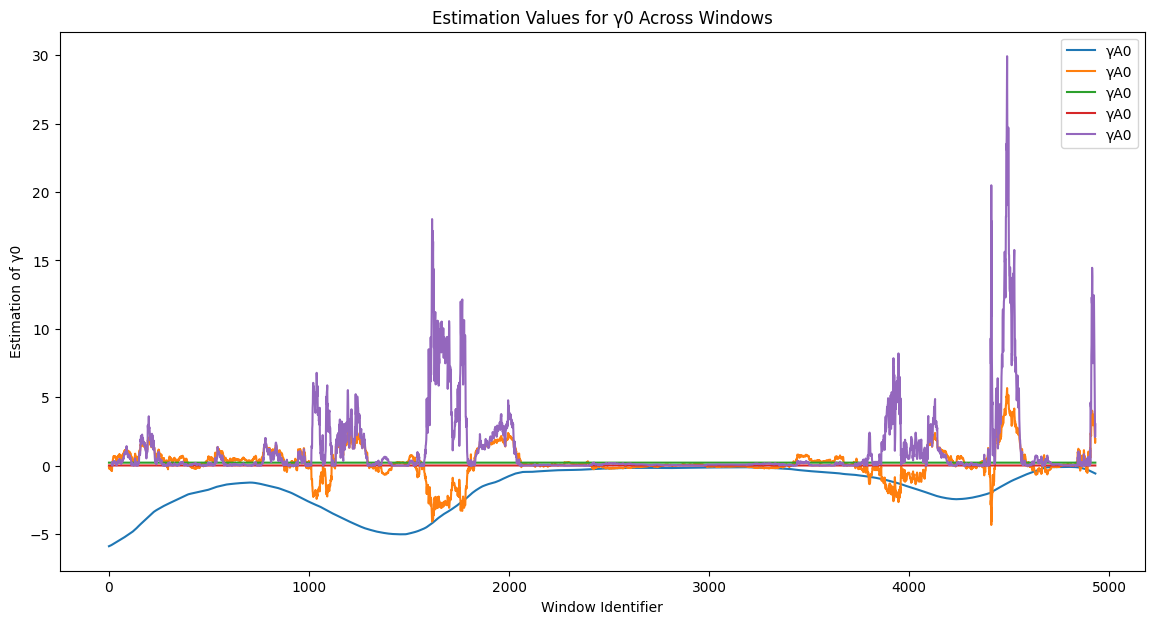

In [ ]:
import matplotlib.pyplot as plt

# Plot γ0 values
plt.figure(figsize=(14, 7))
plt.plot(results_df.index, results_df, label='γA0')
plt.xlabel('Window Identifier')
plt.ylabel('Estimation of γ0')
plt.legend()
plt.title('Estimation Values for γ0 Across Windows')
plt.show()

In [ ]:
#rolling window basis with each window containing 280 days.

# Window size
window_size = 280

# Initialize lists to store estimation results for each window
alpha_A_w = []
beta_A_w = []

# Rolling window estimation
for start in range(len(df) - window_size + 1):
    end = start + window_size
    window_df = df[start:end]

    # Dependent variable (y) and independent variable (X)
    y = window_df['rt_minus_rf']
    X = sm.add_constant(window_df['EMVELECTGOVRN'])  # Adds a constant term for the intercept (alpha)

    # OLS estimation
    model = sm.OLS(y, X).fit()

    # Store the estimated parameters
    alpha_A_w.append(model.params[0])  # Intercept (alpha)
    beta_A_w.append(model.params[1])  # Slope (beta)

# Results could be stored in a DataFrame or processed further
results_df = pd.DataFrame({
    'alpha_A_w': alpha_A_w,
    'beta_A_w': beta_A_w
})

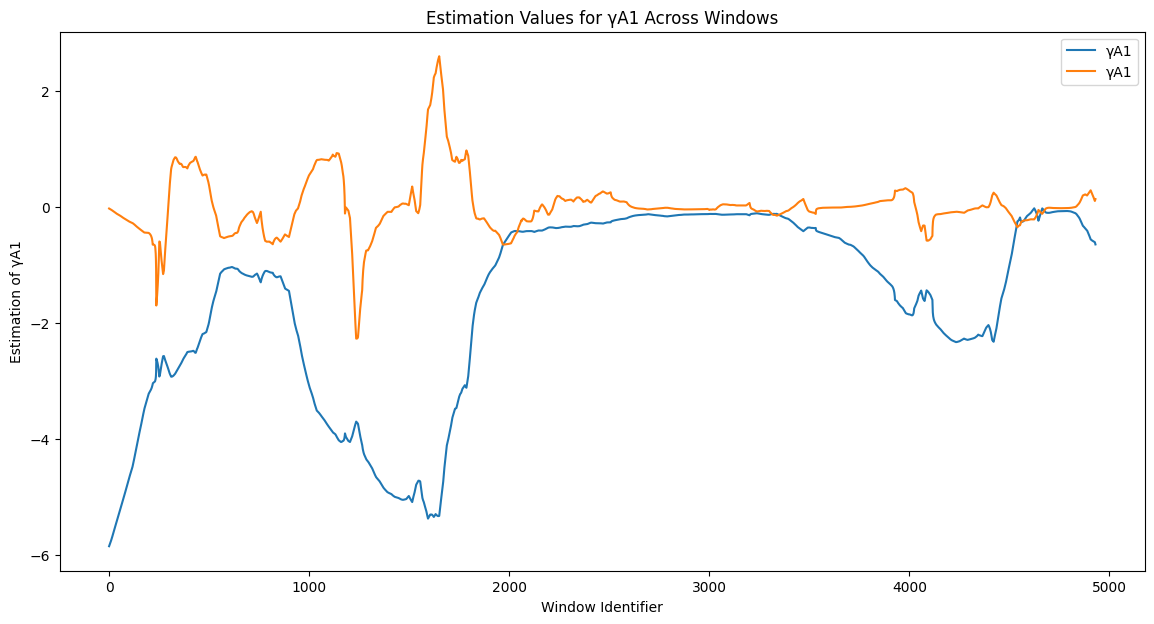

In [ ]:
import matplotlib.pyplot as plt

# Plot γ0 values
plt.figure(figsize=(14, 7))
plt.plot(results_df.index, results_df, label='γA1')
plt.xlabel('Window Identifier')
plt.ylabel('Estimation of γA1')
plt.legend()
plt.title('Estimation Values for γA1 Across Windows')
plt.show()

Model B

In [ ]:
import pandas as pd
import ast
from statsmodels.regression.linear_model import OLS
import numpy as np




In [ ]:
# Check the type of the first element in 'params'
first_element_type = type(results_b['params'].iloc[0])

print(f"Type of the first element in 'params': {first_element_type}")

# If the type is already dict, you don't need


Type of the first element in 'params': <class 'dict'>


In [ ]:
# If the type is already dict, you don't need to convert it
if first_element_type == dict:
    # The 'params' column is already in the correct format
    print("The 'params' column is already a dictionary. No need to convert.")
else:
    # If the type is not dict, then convert strings to dictionaries
    results_b['params'] = results_b['params'].apply(ast.literal_eval)

The 'params' column is already a dictionary. No need to convert.


In [ ]:
# Assuming 'results_b' already contains dictionaries in the 'params' column
# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame(results_b['params'].tolist())

# Now, coefficients_df contains all your regression coefficients as columns


In [ ]:
coefficients_df.head()

,const,C,GS,VIXCLS,WY,XOM,INDPRO,TCU,UNRATE,EMVELECTGOVRN,RECPROUSM156N,TENEXPCHAREARISPRE,EPUFINREG,WPU1174,BUSLOANS
0,8.729186,0.551179,-0.092109,0.022962,-0.042030,-0.099036,-0.502634,0.461711,-0.310502,-0.046468,0.060243,-0.972739,0.000501,-0.154711,0.016600
1,8.240293,0.586728,-0.080960,-0.008420,-0.032035,-0.073476,-0.467476,0.433418,-0.263957,-0.046043,0.060019,-1.041334,0.000587,-0.149472,0.015386
2,7.724973,0.559986,-0.039469,-0.005654,-0.033513,-0.161039,-0.429672,0.402963,-0.212699,-0.045628,0.059787,-1.118770,0.000687,-0.143729,0.014058
3,7.253233,0.498970,-0.062684,-0.015296,-0.020313,-0.224944,-0.388106,0.368012,-0.160067,-0.045014,0.059509,-1.211883,0.000784,-0.136472,0.012525
4,6.454082,0.486241,-0.095019,0.028684,-0.032123,-0.298290,-0.339372,0.330203,-0.087959,-0.044697,0.059124,-1.307394,0.000953,-0.130023,0.010923


Lasso for Model 3

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Assuming df is the DataFrame with the combined daily and MONTHLY data

# Specify the independent variables (all x-covariates and market excess return) and dependent variable
independent_vars = ['C', 'GS', 'VIXCLS', 'WY', 'XOM', 'INDPRO', 'TCU', 'UNRATE', 'EMVELECTGOVRN', 'RECPROUSM156N', 'TENEXPCHAREARISPRE', 'EPUFINREG', 'WPU1174', 'BUSLOANS']
dependent_var = 'rt_minus_rf'

# Define the window size
window_size = 280

# Prepare a dataframe to collect results
results_c = pd.DataFrame(columns=['window', 'alpha_C_w', 'beta_C_w'] + independent_vars + ['lambda_w'])

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Loop through the rolling windows
for start in range(len(df) - window_size + 1):
    end = start + window_size
    window_df = df[start:end]

    # Prepare the independent variables (X) and the dependent variable (y)
    X = window_df[independent_vars]
    y = window_df[dependent_var]

    # Standardize the data
    X_scaled = scaler.fit_transform(X)

    # Define a range of alpha (lambda) values to test
    alpha_range = np.logspace(-4, -0.5, 30)

    # Set up the Lasso regression model with cross-validation to find the best alpha
    lasso_cv = GridSearchCV(Lasso(), param_grid={'alpha': alpha_range}, cv=5).fit(X_scaled, y)

    # Best model after CV
    best_lasso = lasso_cv.best_estimator_

    # Collect results
    results = {
        'window': start + 1,
        'alpha_C_w': best_lasso.intercept_,
        'beta_C_w': best_lasso.coef_[0],  # Assuming the market excess return is the first column in X
        'lambda_w': best_lasso.alpha,
    }

    # Add the coefficient of each variable to the results
    for idx, var in enumerate(independent_vars):
        results[var] = best_lasso.coef_[idx]

    results_c = results_c.append(results, ignore_index=True)

# Save the results or process them further
results_c.to_csv('Model_C_Estimates.csv', index=False)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.402e-01, tolerance: 8.985e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e-01, tolerance: 1.667e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

KeyboardInterrupt: 

In [ ]:
print(coefficients_df.columns)

Index(['const', 'C', 'GS', 'VIXCLS', 'WY', 'XOM', 'INDPRO', 'TCU', 'UNRATE',
       'EMVELECTGOVRN', 'RECPROUSM156N', 'TENEXPCHAREARISPRE', 'EPUFINREG',
       'WPU1174', 'BUSLOANS'],
      dtype='object')
